# 稀疏字典學習(Sparse Dictionary Learning)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import logging
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# Dataset

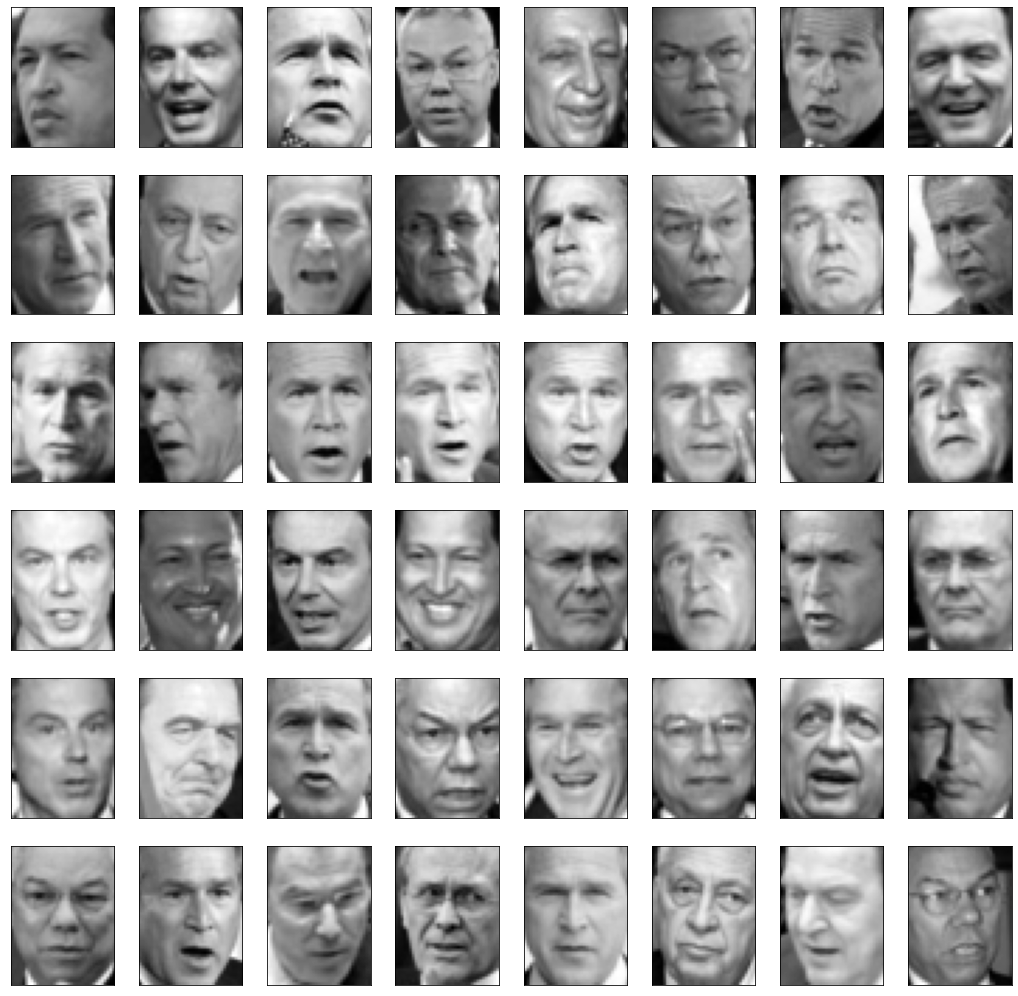

In [2]:
from sklearn.datasets import fetch_lfw_people
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
x=lfw_people.data/256
y=lfw_people.target
n_samples, h, w = lfw_people.images.shape
N=len(y)
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(x[i,:].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Sparse Dictionary Learning

In [5]:
k=100
n,m=x.shape
A=np.random.rand(k,n)
D=np.ones((m,k))*np.sqrt(1/m)
num=np.array(range(n))
T=30
for t in tqdm(range(T)):
    for i in range(0,90):
        grad=-np.dot(D.T,x.T-np.dot(D,A))+np.sign(A)
        A-=0.01*grad
    lmb=np.zeros(k)
    temp1=np.dot(x.T,A.T)
    for i in range(0,300):
        temp2=np.linalg.inv(np.dot(A,A.T)+np.diag(lmb))
        dR=np.sum(np.dot(temp1,temp2)**2,axis=0)-1
        ddR=np.diagonal(-2*np.dot(np.dot(np.dot(temp2,temp1.T),temp1),temp2)*temp2)
        lmb-=(dR/ddR)
    D=np.dot(temp2,temp1.T).T

# Plot

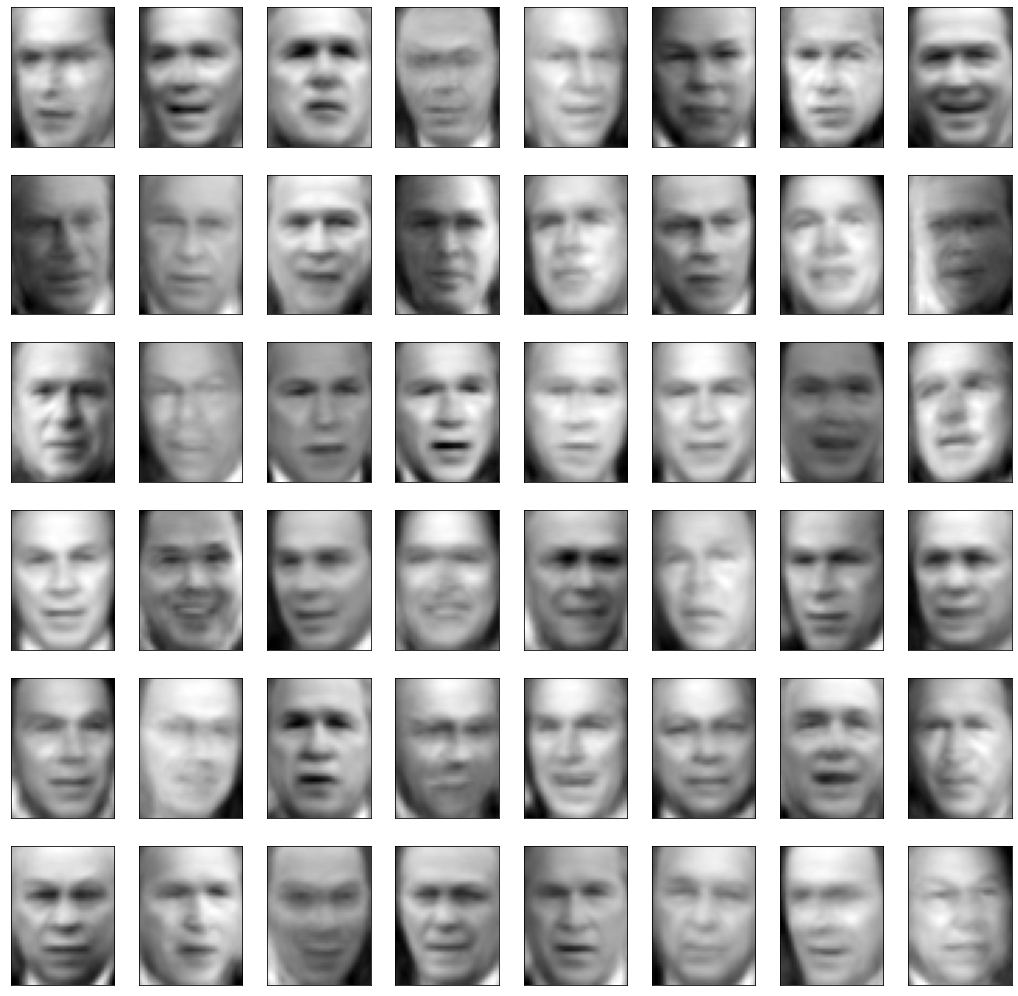

In [6]:
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
x_pred=np.dot(D,A)
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(x_pred[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 